#範例

In [ ]:
N1 = 20
N2 = 20
N3 = 20

In [ ]:
!pip install gradio

In [ ]:
%matplotlib inline

# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路方面
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# 互動設計用
from ipywidgets import interact_manual

# 神速打造 web app 的 Gradio
import gradio as gr

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


normalization

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

格式整理

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

建構神經網路

In [ ]:
model = Sequential()
model.add(Dense(N1, input_dim=784, activation='relu'))
model.add(Dense(N2, activation='relu'))
model.add(Dense(N3, activation='relu'))

激發函數

In [ ]:
model.add(Dense(10, activation='softmax'))

組裝

In [ ]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])

檢視神經網路

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

實際訓練
- N1 = 20
- N2 = 20
- N3 = 20

In [1]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

NameError: name 'model' is not defined

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print(f"測試資料正確率 {acc*100:.2f}%")
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9140 - loss: 0.0135
測試資料正確率 92.70%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9140 - loss: 0.0135
loss: 0.01166616939008236
正確率 0.9269999861717224


#嘗試 建構四層神經網路

In [ ]:
N1 = 128
N2 = 64
N3 = 32
N4 = 16

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Dense(N1, input_dim=784, activation='relu'))
model.add(Dense(N2, activation='relu'))
model.add(Dense(N3, activation='relu'))
model.add(Dense(N4, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, batch_size=100, epochs=10)

loss, acc = model.evaluate(x_test, y_test)
print(f"測試資料正確率 {acc*100:.2f}%")
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1578 - loss: 0.0895
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3035 - loss: 0.0861
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3658 - loss: 0.0739
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5139 - loss: 0.0630
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6610 - loss: 0.0488
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7945 - loss: 0.0327
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8478 - loss: 0.0240
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8712 - loss: 0.0201
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8825 - loss: 0.0181
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8924 - loss: 0.0165
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8812 - loss: 0.0175
測試資料正確率 89.68%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accura

#四層結果0.896 不如三層0.926

可能性:過度擬合
- 神經網路的層數和神經元數量增加導致模型的複雜度也跟著增加。如果訓練資料不足或模型過於複雜，可能會導致過度擬合，即模型在訓練資料上表現很好，但在驗證資料上表現變差。
- 增加 Dropout 層：在隱藏層之間加入 Dropout 層，隨機丟棄一部分神經元，防止過度擬合。

In [2]:
N1 = 128
N2 = 64
N3 = 32
N4 = 16
from tensorflow.keras.layers import Dropout # 導入dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential()
model.add(Dense(N1, input_dim=784, activation='relu'))
model.add(Dropout(0.5))  # N1 隨機丟棄 50% 的神經元
model.add(Dense(N2, activation='relu'))
model.add(Dropout(0.5))  # N2 隨機丟棄 50% 的神經元
model.add(Dense(N3, activation='relu'))
model.add(Dropout(0.5))  # N3 隨機丟棄 50% 的神經元
model.add(Dense(N4, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, batch_size=100, epochs=10)

loss, acc = model.evaluate(x_test, y_test)
print(f"測試資料正確率 {acc*100:.2f}%")
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

NameError: name 'mnist' is not defined

表現大幅下降，可能是因為  Dropout 的使用增加了模型的複雜度，訓練時間的增加才可以讓模型良好的收斂

In [ ]:
N1 = 128
N2 = 64
N3 = 32
N4 = 16
from tensorflow.keras.layers import Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential()
model.add(Dense(N1, input_dim=784, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(N2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(N3, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(N4, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, batch_size=100, epochs=100) # epochs from 10 to 100

loss, acc = model.evaluate(x_test, y_test)
print(f"測試資料正確率 {acc*100:.2f}%")
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1003 - loss: 0.0924
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1305 - loss: 0.0894
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1592 - loss: 0.0874
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1858 - loss: 0.0857
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2215 - loss: 0.0844
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2545 - loss: 0.0830
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2750 - loss: 0.0816
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2932 - loss: 0.0797
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3089 - loss: 0.0777
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3219 - loss: 0.0761
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3414 - loss: 0.0744
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

# 心得和總結

1. **初始模型（三層神經網路）**
   - **架構**：N1=20, N2=20, N3=20
   - **結果**：
     - Loss: 0.0117
     - 正確率: 92.7%
   - 我先測試老師示範的三層神經網路（20-20-20），它的表現不錯，正確率達到 92.7%，比老師在課堂上的結果好一些，我想知道，如果增加模型的複雜度，是否能夠讓它更上一層樓？於是將模型擴展為四層（128-64-32-16）

2. **增加模型複雜度（四層神經網路）**
   - **架構**：N1=128, N2=64, N3=32, N4=16
   - **結果**：
     - Loss: 0.0153
     - 正確率: 89.7%
   -　結果出乎意料——正確率不升反降掉到了 89.7%。這讓我意識到，模型的複雜度並非越高越好，過多的層數和神經元可能會讓模型迷失在資料的海洋中，無法找到正確的方向。當然用專業一點的說法就是 over-fitting。

3. **加入 Dropout 防止過度擬合**
   - **架構**：四層神經網路 + Dropout（比率 0.5）
   - **結果**：
     - Loss: 0.0634
     - 正確率: 50.4%
   -　為了防止過度擬合，我加入 Dropout 層，並將比率設為 0.5。然而這一次的嘗試的正確率暴跌至 50.4%，我體會到，Dropout 雖然是一個強大的工具，但如果使用不當，反而會讓模型失去學習的能力。

4. **調整訓練參數**
   - **改進措施**：
     - 增加訓練 Epochs 至 100
   - **結果**：
     - Loss: 0.0105
     - 正確率: 94.2%
   -　最後我增加了訓練的 Epochs 至 100。這一次，模型終於展現出了它的潛力，正確率提升到了 94.2%，Loss 值也顯著降低。這讓我明白，調參不僅需要勇氣，更需要細心與耐心。

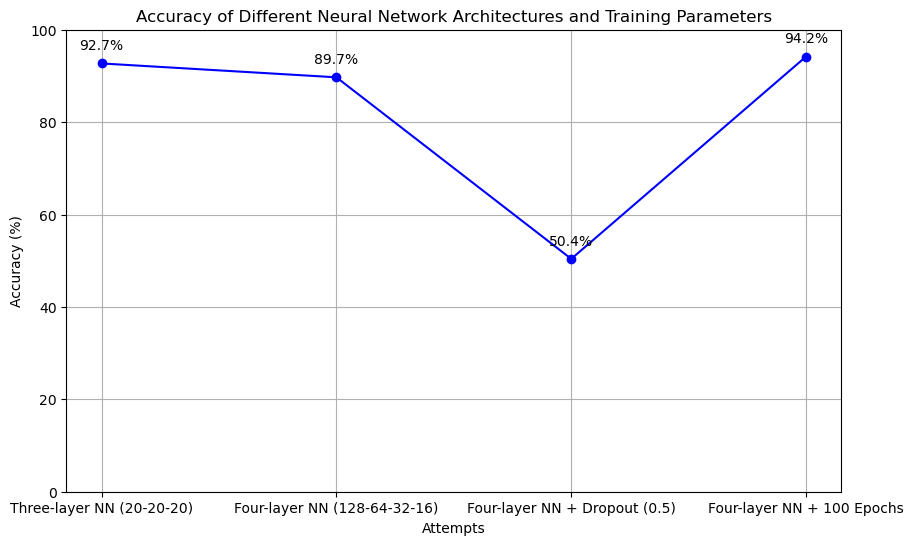